Survivors Classification on Titanic using  R
===

Wesley Nogueira Galvão 

July, 2019

# Introduction

# Question definition

# Data

## Data Dictionary

|Variable |Definition|Key|
|:---- |----|----:|
|survival  | Survival |0 = No, 1 = Yes|
|pclass |Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex  |Sex| 	
|Age  | Age in years| 	
|sibsp| # of siblings / spouses aboard the Titanic |
|parch |# of parents / children aboard the Titanic |	
|ticket| Ticket number| 	
|fare 	|Passenger fare (British pound)| 	
|cabin 	|Cabin number| 	
|embarked |Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**Variables Notes**
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them. 

# Strategy

# Feature Engineering

In [26]:
library('ggplot2')   # visualization
library('ggthemes')  # visualization
library('scales')    # visualization
library('dplyr')     # data manipulation
library('csv')       # CVS manipulation
library('tidyr')
library('tibble')
library('janitor')
library('gridExtra')  # arrange plots
library('ggpubr')


In [27]:
#Reading the datasets
train <- read.csv('train.csv', stringsAsFactors = F, header=T, na.strings=c(""))
test <- read.csv('test.csv', stringsAsFactors = F, header=T, na.strings=c(""))
#Bindind both parts to the same dataset
titanic_data <- bind_rows(train, test) 

In [28]:
# dataset dimension
cat(sprintf('Dataset dimension: %d rows and %d columns',dim(titanic_data)[1], dim(titanic_data)[2]))

Dataset dimension: 1309 rows and 12 columns

In [29]:
head(titanic_data, 5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S


## New features

### Family size

In [30]:
# FamilySize feature creation
titanic_data$FamilySize <- titanic_data$SibSp + titanic_data$Parch + 1

### Name Titles 

In [31]:
# Extract title from passenger name and add it to Title feature
titanic_data$Title <- gsub('(.*, )|(\\..*)', '', titanic_data$Name)
# Create the secondary Tittle feature
titanic_data$Title2 <- gsub('(.*, )|(\\..*)', '', titanic_data$Name)
# Summarise the title type by its proportion
title_prop <- titanic_data %>% 
 tabyl(Title) %>%
 adorn_pct_formatting(digits = 1)
title_prop

Title,n,percent
Capt,1,0.1%
Col,4,0.3%
Don,1,0.1%
Dona,1,0.1%
Dr,8,0.6%
Jonkheer,1,0.1%
Lady,1,0.1%
Major,2,0.2%
Master,61,4.7%
Miss,260,19.9%


In [32]:
# Define a variable that will receive the rare titles as a vector
rare <- c()
# Loop to store occurrences less than 10
for(i in 1:18){
    if (title_prop[i,2] < 10){
        rare[i] <- title_prop[i,1]
    } 
}
# Drop the NA ocurrences
rare <- rare  %>% na.omit()
rare

[1] "Capt"         "Col"          "Don"          "Dona"         "Dr"          
 [6] "Jonkheer"     "Lady"         "Major"        "Mlle"         "Mme"         
[11] "Ms"           "Rev"          "Sir"          "the Countess"
attr(,"na.action")
[1]  9 10 13 14
attr(,"class")
[1] "omit"

In [33]:
# Treating the first Title feature. 
titanic_data$Title[titanic_data$Title %in% rare] <- 'Rare'
titanic_data$Title[titanic_data$Title == 'Mlle'] <- 'Miss'
titanic_data$Title[titanic_data$Title == 'Ms']   <- 'Miss'
titanic_data$Title[titanic_data$Title == 'Mme']  <- 'Mrs'

In [34]:
# Treating the second Title feature
titanic_data$Title2[titanic_data$Title2 == 'Capt']         <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'Col']          <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'Don']          <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'Dona']         <- 'Mrs'
titanic_data$Title2[titanic_data$Title2 == 'Lady']         <- 'Mrs'
titanic_data$Title2[titanic_data$Title2 == 'Major']        <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'Mlle']         <- 'Miss'
titanic_data$Title2[titanic_data$Title2 == 'Mme']          <- 'Mrs'
titanic_data$Title2[titanic_data$Title2 == 'Ms']           <- 'Miss'
titanic_data$Title2[titanic_data$Title2 == 'Rev']          <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'Sir']          <- 'Mr'
titanic_data$Title2[titanic_data$Title2 == 'the Countess'] <- 'Mrs'

ifelse(titanic_data$Title2 == 'Dr' && titanic_data$Sex == 'male',
       titanic_data$Title2[titanic_data$Title2 == 'Dr'] <- 'Mr',
       titanic_data$Title2[titanic_data$Title2 == 'Dr'] <- 'Mrs')

ifelse(titanic_data$Title2 == 'Jonkheer' && titanic_data$Sex == 'male',
       titanic_data$Title2[titanic_data$Title2 == 'Jonkheer'] <- 'Mr',
       titanic_data$Title2[titanic_data$Title2 == 'Jonkheer'] <- 'Miss')

[1] "Mrs"

[1] "Miss"

In [35]:
# Title proportion for the first Title feature after feature engineering 
title_prop <- titanic_data %>% 
 tabyl(Title) %>%
 adorn_pct_formatting(digits = 1)
title_prop
# Title proportion for the second Title feature after feature engineering 
title_prop2 <- titanic_data %>% 
 tabyl(Title2) %>%
 adorn_pct_formatting(digits = 1)
title_prop2

Title,n,percent
Master,61,4.7%
Miss,260,19.9%
Mr,757,57.8%
Mrs,197,15.0%
Rare,34,2.6%


Title2,n,percent
Master,61,4.7%
Miss,265,20.2%
Mr,774,59.1%
Mrs,209,16.0%


### Deck

In [36]:
# Extract the first character that represents the deck and store it in Deck column
titanic_data$Deck <- substr(titanic_data$Cabin, 1, 1)

#Deck proportion by type
deck_prop <- titanic_data %>% 
 tabyl(Deck) %>%
 adorn_pct_formatting(digits = 1)
deck_prop

Deck,n,percent,valid_percent
A,22,1.7%,7.5%
B,65,5.0%,22.0%
C,94,7.2%,31.9%
D,46,3.5%,15.6%
E,41,3.1%,13.9%
F,21,1.6%,7.1%
G,5,0.4%,1.7%
T,1,0.1%,0.3%
NA,1014,77.5%,-


## Missing values

In [37]:
#Check for missing values by feature
sapply(titanic_data, function(x) sum(is.na(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0         263 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1        1014           2 
 FamilySize       Title      Title2        Deck 
          0           0           0        1014

### Missing values of Age

In [38]:
summary(titanic_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

Warning message:
“Removed 263 rows containing non-finite values (stat_bin).”Warning message:
“Removed 263 rows containing non-finite values (stat_boxplot).”

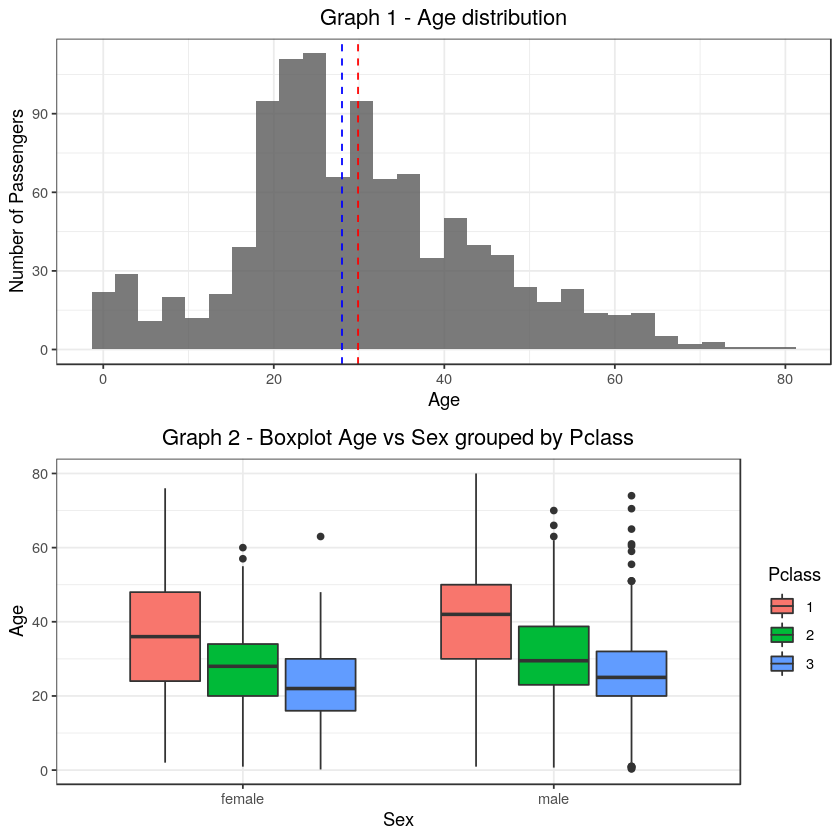

In [39]:
g1 <- titanic_data %>%
    ggplot() + 
    geom_histogram(aes(Age),alpha= 0.8, bins = 30) +
    geom_vline(aes(xintercept = mean(Age, na.rm = T)),
               color = "red", linetype = "dashed", size =.5) +
    geom_vline(aes(xintercept = median(Age, na.rm = T)),
               color = "blue", linetype = "dashed", size =.5) +
    labs(x = "Age", y = "Number of Passengers") +  theme_bw() +  
    ggtitle('Graph 1 - Age distribution') +
    theme(plot.title = element_text(hjust = 0.5))   

g2 <- titanic_data %>%
    ggplot() +
    geom_boxplot(aes(x = Sex, y = Age, fill = as.factor(Pclass))) +
    labs(x = 'Sex', y = 'Age') + 
    scale_fill_discrete(name = "Pclass") + theme_bw() +     
    ggtitle('Graph 2 - Boxplot Age vs Sex grouped by Pclass') + 
    theme(plot.title = element_text(hjust = 0.5)) 


ggarrange(g1, g2, nrow = 2)


In [54]:
#Calculate the median grouped by the Pclass and Sex = male
Mgroup1 <- titanic_data %>% filter(Pclass == 1, Sex == 'male')
Mmedian1 <- median(Mgroup1$Age,na.rm = T)

Mgroup2 <- titanic_data %>% filter(Pclass == 2, Sex == 'male') 
Mmedian2 <- median(Mgroup2$Age,na.rm = T)

Mgroup3 <- titanic_data %>% filter(Pclass == 3, Sex == 'male') 
Mmedian3 <- median(Mgroup3$Age,na.rm = T)



In [41]:
#Calculate the median grouped by the Pclass and Sex = female
Fgroup1 <- titanic_data %>% na.omit() %>% filter(Pclass == 1, Sex == 'female')
Fmedian1 <- median(Fgroup1$Age,na.rm = T)

Fgroup2 <- titanic_data %>% na.omit() %>% filter(Pclass == 2, Sex == 'female') 
Fmedian2 <-median(Fgroup2$Age,na.rm = T)

Fgroup3 <- titanic_data %>% na.omit() %>% filter(Pclass == 3, Sex == 'female') 
Fmedian3 <-median(Fgroup3$Age,na.rm = T)


In [42]:
# Fill the Age's NULL values with median of respective group 
for(i in 1:dim(titanic_data)[1]){
    if(titanic_data$Sex[i] == 'male' && is.na(titanic_data$Age[i])){
        if(titanic_data$Pclass[i] == 1)
            titanic_data$Age[i] <-  Mmedian1
        if(titanic_data$Pclass[i] == 2)
             titanic_data$Age[i] <- Mmedian2
        if(titanic_data$Pclass[i] == 3)
             titanic_data$Age[i] <- Mmedian3
    }
     if(titanic_data$Sex[i] == 'female' && is.na(titanic_data$Age[i])){
        if(titanic_data$Pclass[i] == 1)
            titanic_data$Age[i] <-  Fmedian1
        if(titanic_data$Pclass[i] == 2)
             titanic_data$Age[i] <- Fmedian2
        if(titanic_data$Pclass[i] == 3)
             titanic_data$Age[i] <- Fmedian3
    }
}


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   22.00   26.00   29.34   36.00   80.00 

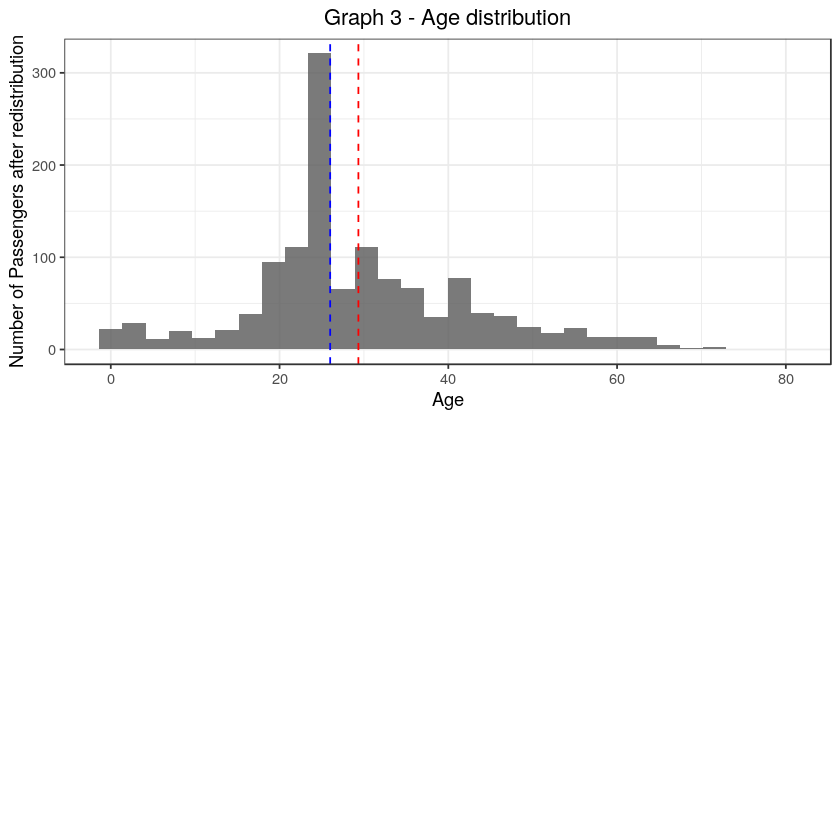

In [53]:
g3 <- titanic_data %>%
    ggplot() + 
    geom_histogram(aes(Age),alpha= 0.8, bins = 30) +
    geom_vline(aes(xintercept = mean(Age, na.rm = T)),
               color = "red", linetype = "dashed", size =.5) +
    geom_vline(aes(xintercept = median(Age, na.rm = T)),
               color = "blue", linetype = "dashed", size =.5) +
    labs(x = "Age", y = "Number of Passengers after redistribution") +  theme_bw() +  
    ggtitle('Graph 3 - Age distribution') +
    theme(plot.title = element_text(hjust = 0.5))   

ggarrange(g3, nrow = 2)
summary(titanic_data$Age)

### Missing values of Deck

In [50]:
# If Cabin value is NULL, store Deck value as 'Unknown'
titanic_data$Deck[is.na(titanic_data$Cabin)] <- 'Unknown'

# Exploratory data analysis

## Data summary

In [45]:
titanic_data %>% 
 tabyl(Sex) %>%
 adorn_pct_formatting(digits = 1)

Sex,n,percent
female,466,35.6%
male,843,64.4%
